[(u'Python', 174), (u'How', 163), (u'Python?', 82), (u'What', 48), (u'string', 43), (u'list', 42), (u'python', 28), (u'way', 25), (u'file', 25), (u'get', 21), (u'Why', 17), (u'using', 16), (u'use', 15), (u'check', 15), (u"Python's", 13)]


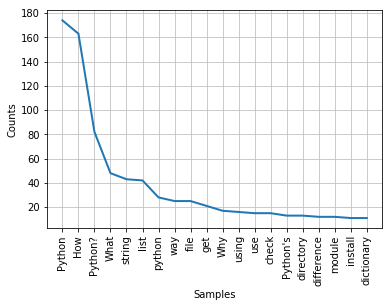

                                             
                                             
[((u'Python?', u'How'), 29), ((u'Python', u'How'), 23), ((u'How', u'get'), 17), ((u'How', u'check'), 11), ((u'How', u'print'), 7), ((u'Python?', u'What'), 7), ((u'Python?', u'Python'), 7), ((u'How', u'make'), 7), ((u'How', u'find'), 6), ((u'How', u'remove'), 6), ((u'How', u'install'), 6), ((u'How', u'use'), 5), ((u'How', u'convert'), 5), ((u'using', u'Python?'), 5), ((u'file', u'Python'), 5)]


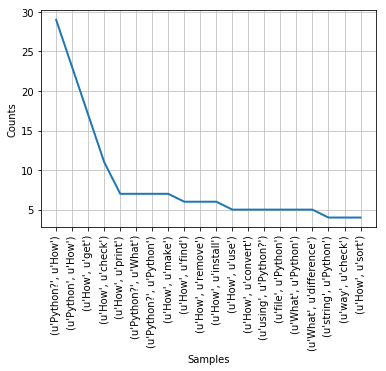

                                             
                                             
[((u'Python', u'How', u'get'), 4), ((u'No', u'module', u'named'), 3), ((u'string', u'Python', u'How'), 3), ((u'string', u'Python?', u'How'), 3), ((u'Python?', u'How', u'get'), 3), ((u'variables', u'Python', u'How'), 3), ((u'dictionary?', u'How', u'get'), 2), ((u'Python?', u'How', u'make'), 2), ((u'Python?', u'What', u'Python'), 2), ((u'Python?', u'How', u'print'), 2), ((u'How', u'sort', u'list'), 2), ((u'Python?', u'Does', u'Python'), 2), ((u'Python', u'modules?', u'How'), 2), ((u'Python?', u'How', u'check'), 2), ((u'environment', u'variables', u'Python'), 2)]


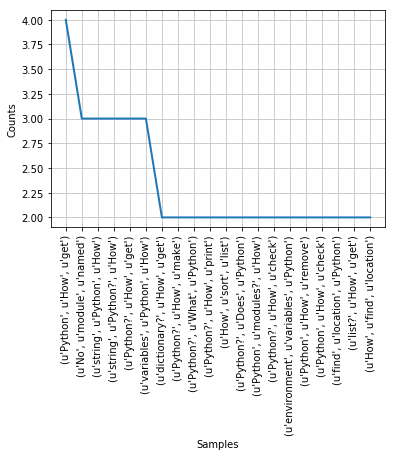

In [2]:
import csv
import nltk
import string
from nltk.corpus import stopwords
from nltk.book import *
from nltk.collocations import *
import pandas as pd
from pandas import DataFrame
from scipy.stats import itemfreq


#topPositive500_questionAndAnswerBody
df = pd.read_csv('pathTo.csv', sep=',', low_memory=False, encoding ='latin-1')


data = DataFrame(df)
colmns = data['Title']

#add stop words you show frequently but think they do not have meaning 
stops = set(stopwords.words('english'))
stops.add('that')
stops.add('.')
stops.add(',')
stops.add('-')
stops.add('Is')
stops.add('I')

#make the word list from the text
word_list = []
for line in colmns:
        for words in line.split():
            if words:
                word_list.append(words)

#take out the stop words from the world list
filtered_words = [word for word in word_list if len(word) > 0 and 
                                             word not in stops]
#frequent words 
fdist = FreqDist(filtered_words)
exclude = set(string.punctuation)


text_file = open("stackoverFlow.txt", "w")
for word in filtered_words:
    word = ''.join(ch for ch in word if ch not in exclude).encode('utf-8')
    text_file.write(word + " ")
    
text_file.close()

#print the most common fifteen words
print fdist.most_common(15)
fdist.plot(20, cumulative=False)


print "                                             "
print "                                             "

biWords = nltk.bigrams(filtered_words)
biFdist = nltk.FreqDist(biWords)
print biFdist.most_common(15)
biFdist.plot(20, cumulative=False)


print "                                             "
print "                                             "



TrWords = nltk.trigrams(filtered_words)
TrFdist = nltk.FreqDist(TrWords)
print TrFdist.most_common(15)
TrFdist.plot(20, cumulative=False)














